# TP 1 - Incendios forestales


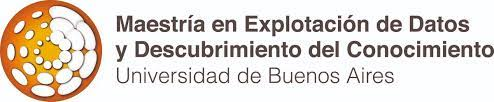

**_Visualización de la Información_**  
1er cuatrimestre 2024

[Víctor A. Bettachini](mailto:bettachini@gmail.com)  
2024-04-01

## Importación de datos


### Superficies provinciales

Datos oficiales de la superfie por provincia argentina se obtuvieron desde la página web del Instituto Geográfico Nacional denominada [División Política, Superficie y Población](https://www.ign.gob.ar/NuestrasActividades/Geografia/DatosArgentina/DivisionPolitica)

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
url = 'https://www.ign.gob.ar/NuestrasActividades/Geografia/DatosArgentina/DivisionPolitica'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')

table = soup.find_all('table')[0]
df_provincias = pd.read_html(str(table))[0]
# decimal separator is comma, replace at all columns
df_provincias = df_provincias.apply(lambda x: x.str.replace('.', '').str.replace(',', '.'))

df_provincias.head()


/tmp/ipykernel_218817/1070144081.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_provincias = pd.read_html(str(table))[0]


,Jurisdicción,Capital,Capital alterna (1),Población 2020 (2),Superficie [km²] (3),Densidad [hab/km²]
0,Ciudad Autónoma de Buenos Aires,(4),(4),3075646,2059,149376
1,Buenos Aires,La Plata,La Matanza y General Pueyrredón,17541141,305907.4,573
2,Gran Buenos Aires,NaN,NaN,NaN,NaN,NaN
3,Interior de Buenos Aires,NaN,NaN,NaN,NaN,NaN
4,Catamarca,San Fernando del Valle de Catamarca,Tinogasta,415438,101486.1,41


In [3]:
# set the index to the province name
df_provincias.set_index('Jurisdicción', inplace=True)

In [4]:
# drop row TOTAL
df_provincias.drop('TOTAL', inplace=True)
df_provincias.drop('Gran Buenos Aires', inplace=True)
df_provincias.drop('Interior de Buenos Aires', inplace=True)

In [5]:
superficies_provincias = df_provincias['Superficie [km²] (3)']
# as numeric
superficies_provincias = superficies_provincias.astype(float)
# superficies_provincias

In [6]:
# Saint Faith
superficies_provincias.rename(index={'Santa Fe': 'Santa Fé'}, inplace=True)

Para Tierra del Fuego solo interesa la superficie de la parte continental.
En la página anterior hay una nota aclaratoria al respecto: ` (6) Considerando sólo la Isla Grande de Tierra del Fuego (20.698 km2), la densidad es de 8,4 hab/ km².`

In [7]:
superficies_provincias.rename(index={'Tierra del Fuego. Antártida e Islas del Atlántico Sur': 'Tierra del Fuego'}, inplace=True)
superficies_provincias['Tierra del Fuego'] = 20698
superficies_provincias

Jurisdicción
Ciudad Autónoma de Buenos Aires      2059.0
Buenos Aires                       305907.4
Catamarca                          101486.1
Chaco                               99763.3
Chubut                             224302.3
Córdoba                            164707.8
Corrientes                          89123.3
Entre Ríos                          78383.7
Formosa                             75488.3
Jujuy                               53244.2
La Pampa                           143492.5
La Rioja                            91493.7
Mendoza                            149069.2
Misiones                            29911.4
Neuquén                             94422.0
Río Negro                          202168.6
Salta                              155340.5
San Juan                            88296.2
San Luis                            75347.1
Santa Cruz                         244457.5
Santa Fé                           133249.1
Santiago del Estero                136934.3
Tierra del Fuego   

### Datos incendios

In [8]:
import pandas as pd

df = pd.read_csv('./TP1 - Dataset incendios - incendios-cantidad-causas-provincia.csv')

In [72]:
df.columns

Index(['año', 'provincia', 'total_incendios', 'incendio_neglgencia',
       'incendio_intencional', 'incendio_natural', 'incendio_desconocida'],
      dtype='object')

In [9]:
# for the df pandas DataFrame generate a pivot table taking province as the main and año
pivot = df.pivot_table(index='provincia', columns='año', values='total_incendios')
# all values in dataframe as integers
pivot = pivot.fillna(0).astype(int)

In [10]:
pivot.index

Index(['Buenos Aires', 'Catamarca', 'Chaco', 'Chubut',
       'Ciudad Autónoma de Buenos Aires', 'Corrientes', 'Córdoba',
       'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa', 'La Rioja', 'Mendoza',
       'Misiones', 'Neuquén', 'Parques Nacionales', 'Río Negro', 'Salta',
       'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe', 'Santa Fé',
       'Santiago del Estero', 'Tierra del Fuego', 'Tucumán'],
      dtype='object', name='provincia')

In [11]:
pivot.loc['Santa Fé']

año
1993      0
1994      0
1995      0
1996      0
1997      0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
2018      0
2019    442
Name: Santa Fé, dtype: int64

In [12]:
# put single value in a variable
pivot.loc['Santa Fé', 2019]

# set value in a cell
pivot.loc['Santa Fe', 2019] = pivot.loc['Santa Fé', 2019]

In [13]:
pivot.loc['Santa Fe']

año
1993       0
1994       0
1995     297
1996     602
1997     394
1998     302
1999     462
2000     651
2001     639
2002     815
2003     917
2004     987
2005     712
2006    1507
2007     751
2008    1037
2009     778
2010    1024
2011    1658
2012    1613
2013    1625
2014     856
2015    1047
2016    1241
2017    1096
2018    1691
2019     442
Name: Santa Fe, dtype: int64

In [14]:
# remove 'Parques Nacionales' row from the pivot table
pivot_sansPN = pivot.drop('Parques Nacionales')
# Solve double Santa Fé
pivot_sansPN = pivot_sansPN.drop('Santa Fé')
# rename index in the pivot table
pivot_sansPN.rename(index={'Santa Fe': 'Santa Fé'}, inplace=True)
pivot_sansPN

año,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
provincia,,,,,,,,,,,,,,,,,,,,,
Buenos Aires,0,0,1,7,1508,5007,4645,3503,1845,4855,...,1644,1174,111,458,2788,1794,2802,2142,2879,0
Catamarca,0,0,0,1732,12,6,6,15,11,231,...,42,38,84,90,69,186,197,254,210,44
Chaco,0,0,0,153,55,43,557,664,541,525,...,318,529,597,480,445,222,253,645,1012,0
Chubut,21,109,138,159,98,230,145,104,138,140,...,238,169,89,106,76,82,89,46,37,36
Ciudad Autónoma de Buenos Aires,0,0,0,0,0,0,0,1,4,0,...,1,3,6,6,2,3,5,1,5,1
Corrientes,48,26,532,652,144,36,565,132,49,101,...,50,18,215,101,64,22,12,78,82,10
Córdoba,151,161,2441,92,387,307,55,869,194,101,...,192,147,135,173,291,3,283,282,295,32
Entre Ríos,179,145,27,17,314,135,704,86,162,91,...,60,38,94,112,24,42,23,23,174,23
Formosa,1,1,1,7,50,34,65,57,76,64,...,0,131,42,326,63,68,61,69,85,48


### Normalización por superficie

In [15]:
# normalize the pivot table by the area of each province
pivot_sansPN_norm = pivot_sansPN.div(superficies_provincias, axis=0)
pivot_sansPN_norm

año,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Buenos Aires,0.000000,0.000000,0.000003,0.000023,0.004930,0.016368,0.015184,0.011451,0.006031,0.015871,...,0.005374,0.003838,0.000363,0.001497,0.009114,0.005865,0.009160,0.007002,0.009411,0.000000
Catamarca,0.000000,0.000000,0.000000,0.017066,0.000118,0.000059,0.000059,0.000148,0.000108,0.002276,...,0.000414,0.000374,0.000828,0.000887,0.000680,0.001833,0.001941,0.002503,0.002069,0.000434
Chaco,0.000000,0.000000,0.000000,0.001534,0.000551,0.000431,0.005583,0.006656,0.005423,0.005262,...,0.003188,0.005303,0.005984,0.004811,0.004461,0.002225,0.002536,0.006465,0.010144,0.000000
Chubut,0.000094,0.000486,0.000615,0.000709,0.000437,0.001025,0.000646,0.000464,0.000615,0.000624,...,0.001061,0.000753,0.000397,0.000473,0.000339,0.000366,0.000397,0.000205,0.000165,0.000160
Ciudad Autónoma de Buenos Aires,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000486,0.001943,0.000000,...,0.000486,0.001457,0.002914,0.002914,0.000971,0.001457,0.002428,0.000486,0.002428,0.000486
Corrientes,0.000539,0.000292,0.005969,0.007316,0.001616,0.000404,0.006340,0.001481,0.000550,0.001133,...,0.000561,0.000202,0.002412,0.001133,0.000718,0.000247,0.000135,0.000875,0.000920,0.000112
Córdoba,0.000917,0.000977,0.014820,0.000559,0.002350,0.001864,0.000334,0.005276,0.001178,0.000613,...,0.001166,0.000892,0.000820,0.001050,0.001767,0.000018,0.001718,0.001712,0.001791,0.000194
Entre Ríos,0.002284,0.001850,0.000344,0.000217,0.004006,0.001722,0.008981,0.001097,0.002067,0.001161,...,0.000765,0.000485,0.001199,0.001429,0.000306,0.000536,0.000293,0.000293,0.002220,0.000293
Formosa,0.000013,0.000013,0.000013,0.000093,0.000662,0.000450,0.000861,0.000755,0.001007,0.000848,...,0.000000,0.001735,0.000556,0.004319,0.000835,0.000901,0.000808,0.000914,0.001126,0.000636
Jujuy,0.000000,0.000000,0.000000,0.000376,0.002554,0.000582,0.002535,0.000376,0.000319,0.000376,...,0.004094,0.003982,0.003737,0.004620,0.002967,0.003249,0.003662,0.004263,0.003850,0.000244


In [16]:
# sort by 2019 values
pivot_sansPN_norm.sort_values(by=2019, ascending=False)

año,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Santa Fé,0.000000,0.000000,0.002229,0.004518,0.002957,0.002266,0.003467,0.004886,0.004796,0.006116,...,0.007685,0.012443,0.012105,0.012195,0.006424,0.007857,0.009313,0.008225,0.012691,0.003317
Río Negro,0.000178,0.001276,0.002068,0.001786,0.003462,0.005921,0.004462,0.005654,0.009082,0.009655,...,0.006163,0.005589,0.003878,0.005124,0.004472,0.005258,0.003789,0.002300,0.004323,0.001934
Formosa,0.000013,0.000013,0.000013,0.000093,0.000662,0.000450,0.000861,0.000755,0.001007,0.000848,...,0.000000,0.001735,0.000556,0.004319,0.000835,0.000901,0.000808,0.000914,0.001126,0.000636
Ciudad Autónoma de Buenos Aires,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000486,0.001943,0.000000,...,0.000486,0.001457,0.002914,0.002914,0.000971,0.001457,0.002428,0.000486,0.002428,0.000486
Catamarca,0.000000,0.000000,0.000000,0.017066,0.000118,0.000059,0.000059,0.000148,0.000108,0.002276,...,0.000414,0.000374,0.000828,0.000887,0.000680,0.001833,0.001941,0.002503,0.002069,0.000434
La Pampa,0.000467,0.000376,0.000153,0.000049,0.000091,0.000223,0.000063,0.000355,0.000502,0.000962,...,0.000167,0.000265,0.000174,0.000606,0.000348,0.000502,0.000634,0.000878,0.001443,0.000355
Tierra del Fuego,0.000435,0.001208,0.001111,0.001353,0.001111,0.001353,0.001401,0.001015,0.001304,0.000821,...,0.006571,0.000966,0.000483,0.000773,0.000580,0.000966,0.000676,0.000338,0.000773,0.000338
La Rioja,0.000000,0.000087,0.000044,0.000055,0.000044,0.000044,0.000066,0.000230,0.000481,0.000339,...,0.000404,0.001760,0.001825,0.002711,0.001825,0.002426,0.002864,0.001803,0.002011,0.000295
Entre Ríos,0.002284,0.001850,0.000344,0.000217,0.004006,0.001722,0.008981,0.001097,0.002067,0.001161,...,0.000765,0.000485,0.001199,0.001429,0.000306,0.000536,0.000293,0.000293,0.002220,0.000293
Jujuy,0.000000,0.000000,0.000000,0.000376,0.002554,0.000582,0.002535,0.000376,0.000319,0.000376,...,0.004094,0.003982,0.003737,0.004620,0.002967,0.003249,0.003662,0.004263,0.003850,0.000244


In [17]:
# decadal average
pivot_sansPN_norm.columns

Index([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019],
      dtype='int64', name='año')

In [18]:
norm90s = pivot_sansPN_norm[pivot_sansPN_norm.columns[0:6]].mean(axis=1)

In [19]:
decadal_norm = pd.DataFrame()
# name the index column
decadal_norm.index.name = 'Provincia'
decadal_norm['90s'] = pivot_sansPN_norm[pivot_sansPN_norm.columns[0:6]].mean(axis=1)
decadal_norm['00s'] = pivot_sansPN_norm[pivot_sansPN_norm.columns[6:10]].mean(axis=1)
decadal_norm['10s'] = pivot_sansPN_norm[pivot_sansPN_norm.columns[10:]].mean(axis=1)
decadal_norm.sort_values(by='10s', ascending=False)

,90s,00s,10s
Provincia,,,
Buenos Aires,0.003554,0.012134,0.010860
Santa Fé,0.001995,0.004816,0.008380
Misiones,0.004363,0.017886,0.008002
Tucumán,0.000391,0.000277,0.007694
Río Negro,0.002448,0.007213,0.006802
Salta,0.000689,0.006801,0.004763
Chaco,0.000419,0.005731,0.003728
San Juan,0.000687,0.003072,0.003499
Jujuy,0.000585,0.000902,0.003343


## Gráficos

In [20]:
import matplotlib.pyplot as plt

In [21]:
### Décadas por superficie
# plot first five at 10s
top10_10s = decadal_norm.sort_values(by='10s', ascending=False).head(10)
# top5_10s.plot(kind='barh', y='10s', title='Incendios promedio normalizados por superficie', legend=False)

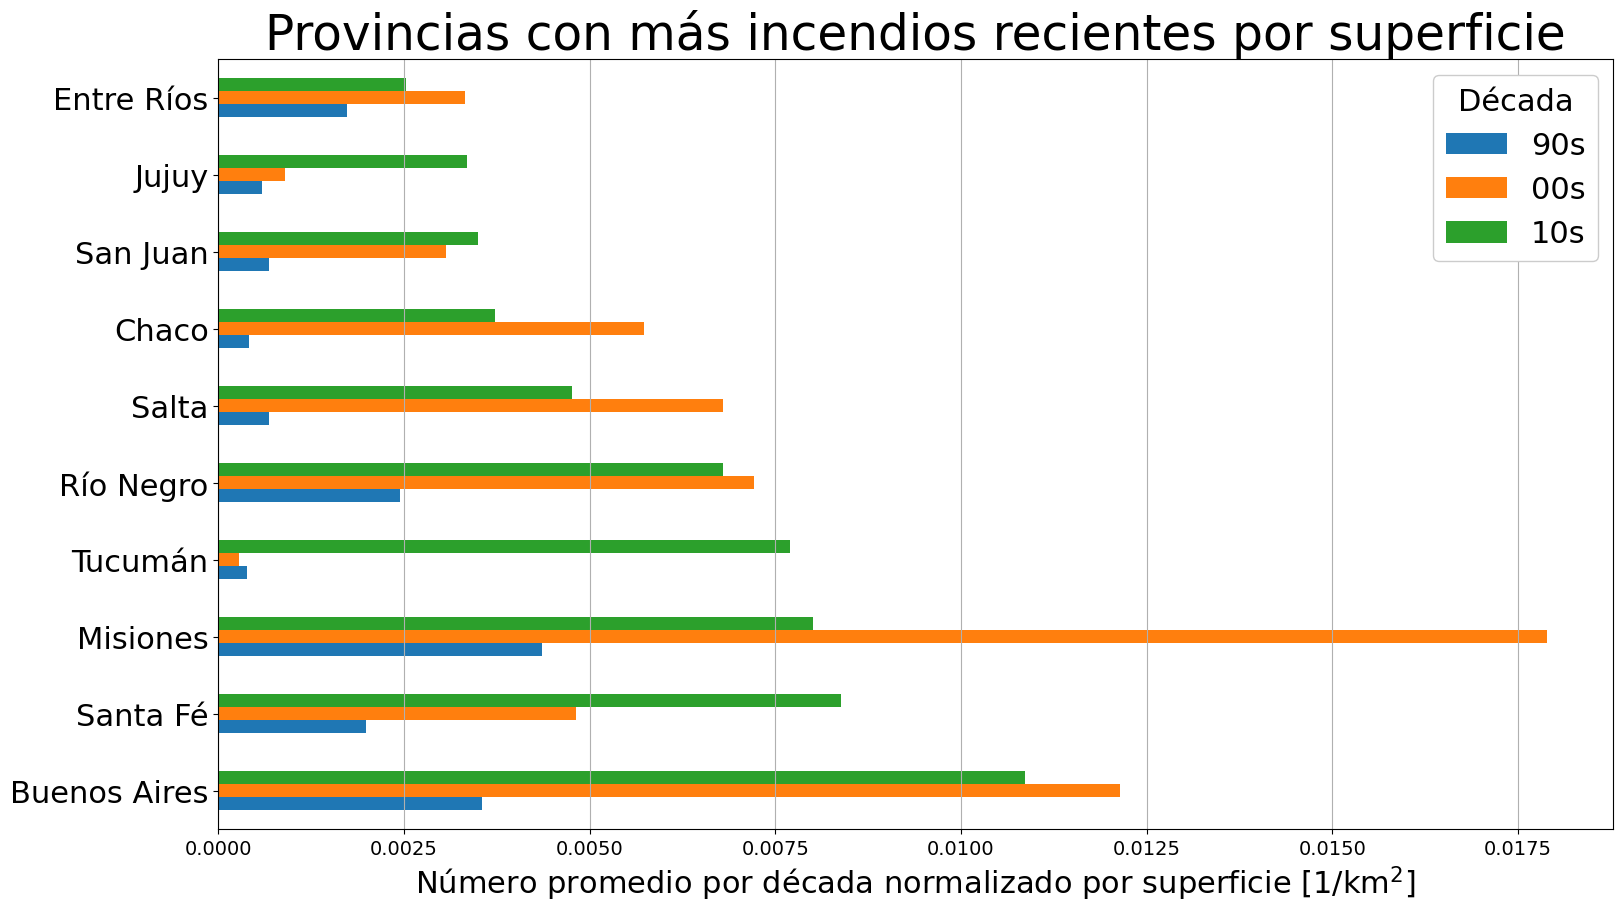

In [71]:
# same as above but adding xlabel
fig, ax = plt.subplots(figsize=(18, 10))
top10_10s.plot(kind='barh', y=['90s', '00s', '10s'], fontsize=22, ax=ax)
ax.set_title('Provincias con más incendios recientes por superficie', fontsize=35)
ax.legend(title= 'Década', fontsize= 22, title_fontsize=22, facecolor='white', framealpha=1)
# plt.setp(ax.get_legend().get_title(), fontsize=22)
ax.set_xlabel('Número promedio por década normalizado por superficie [1/km$^2$]', fontsize=22)
ax.set_ylabel('')
# ax.set_ylabel('Provincia', fontsize=22)
ax.tick_params(axis= 'x', labelsize=14)
# ax.set_xticks([0, 0.0005, 0.001, 0.0015, 0.002, 0.0025], fontsize=12)
# set legend title fontsize
ax.grid(axis='x')
plt.savefig('top10_10s.pdf')
plt.show()

In [207]:
import numpy as np

In [209]:
for decade in top10_10s.columns:
  print(decade)

90s
00s
10s


Text(0.5, 1.0, 'Incendios normalizados por superficie, promedio en la década')

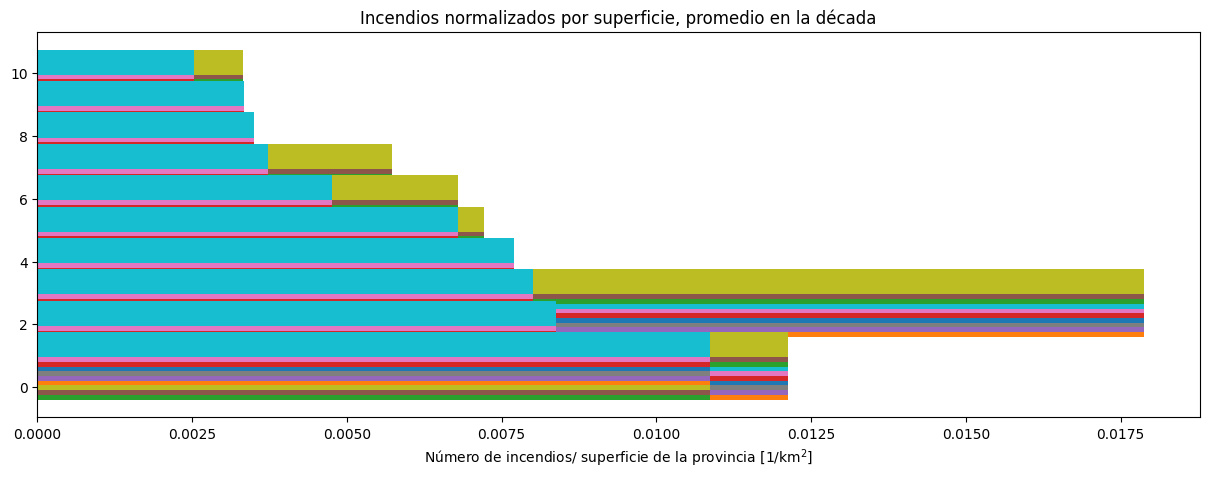

In [215]:
# same as above but as using matplotlib objects methodology
fig, ax = plt.subplots(figsize = (15,5) )
data =  top10_10s
y_labels = np.arange(len(data.index))
width = 0.15

multiplier = 0
for province in top10_10s.index:
  offset = width* multiplier
  for decade in top10_10s.columns:
    rects= ax.barh(y_labels+ offset, width= top10_10s[decade], label = province)
  multiplier += 1

#ax.barh(y = data.index, width= top10_10s['10s'])
#ax.barh(y = data.index, width= top10_10s['00s'])
#ax.barh(y = data.index, width= top10_10s['90s'])
ax.set_xlabel('Número de incendios/ superficie de la provincia [1/km$^2$]')
ax.set_title('Incendios normalizados por superficie, promedio en la década')


### Número de incendios en cada provincia y año

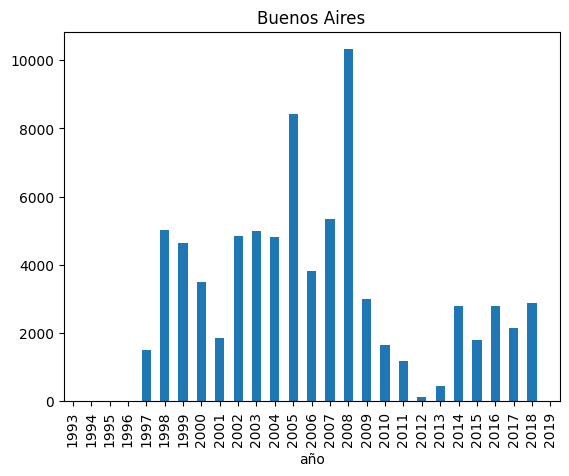

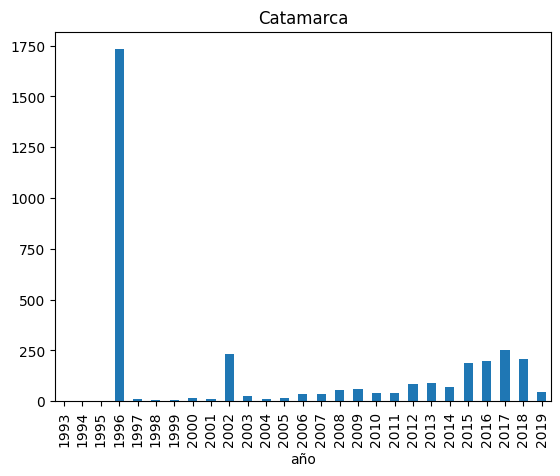

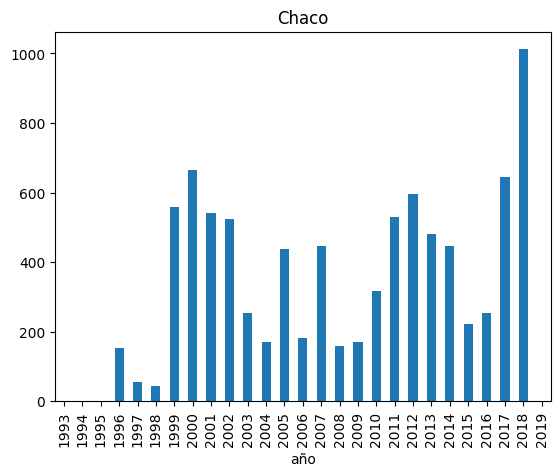

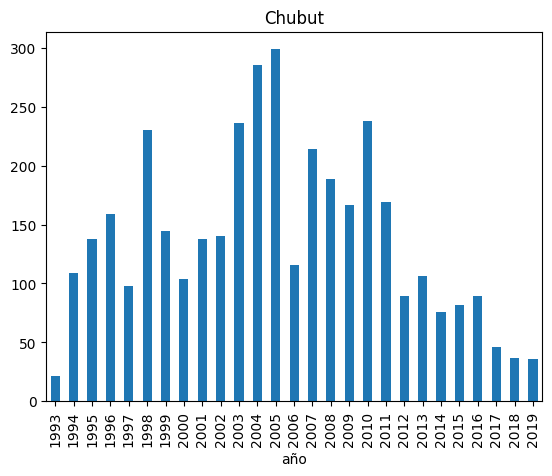

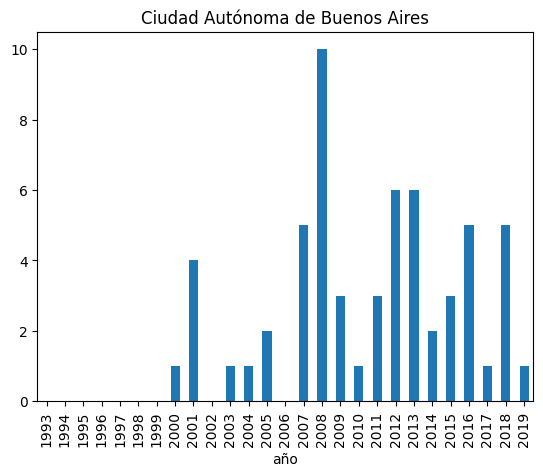

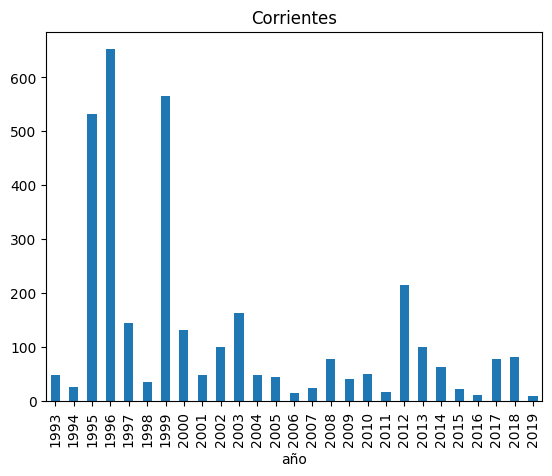

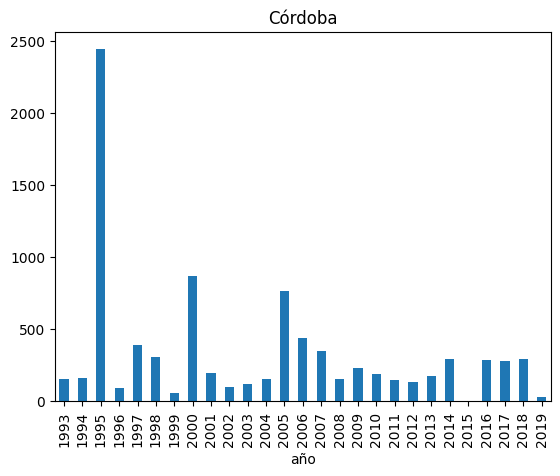

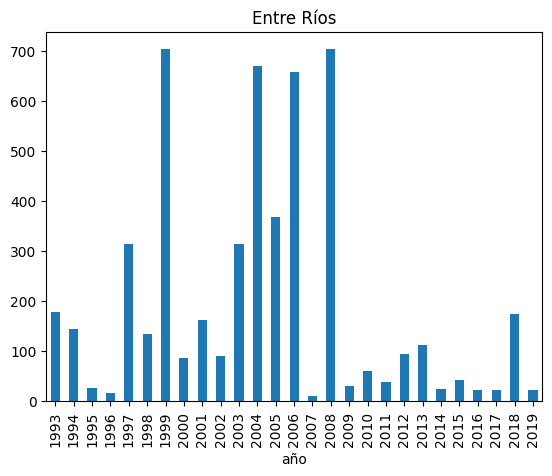

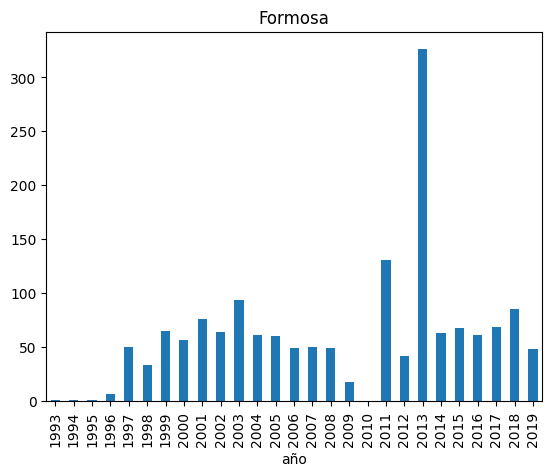

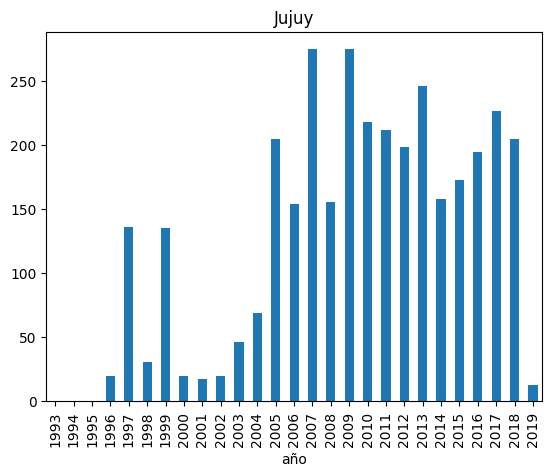

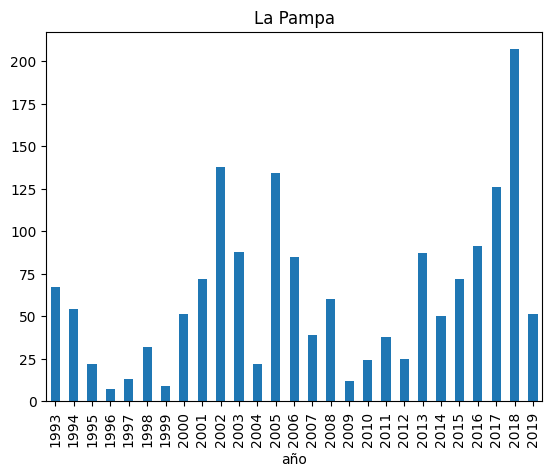

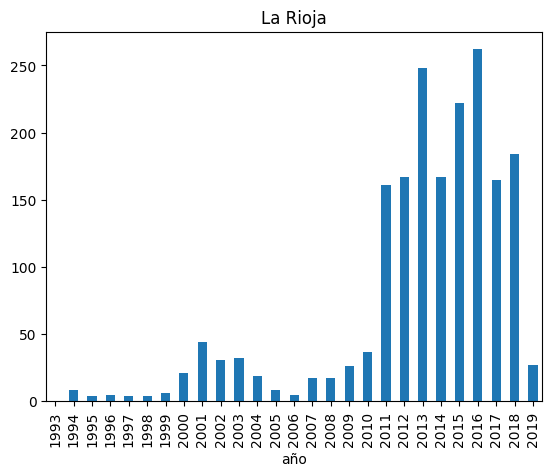

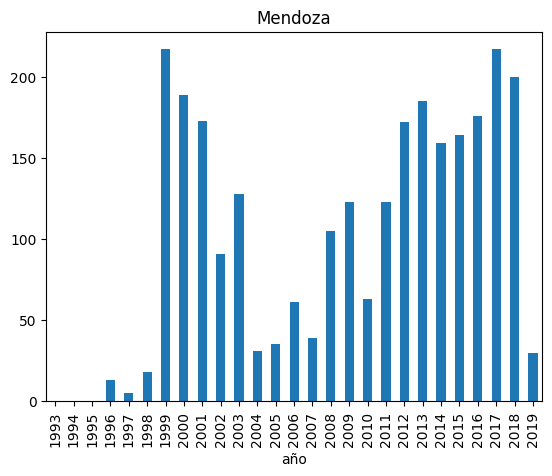

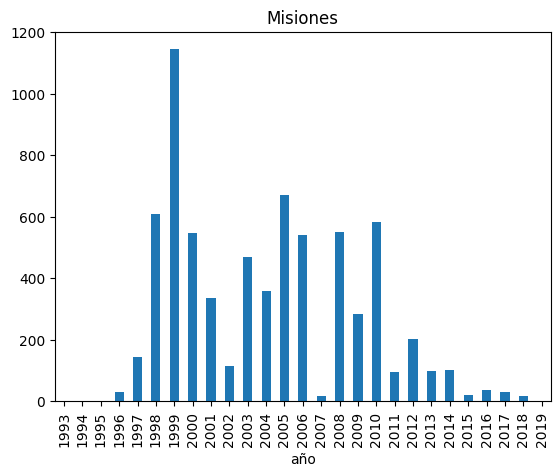

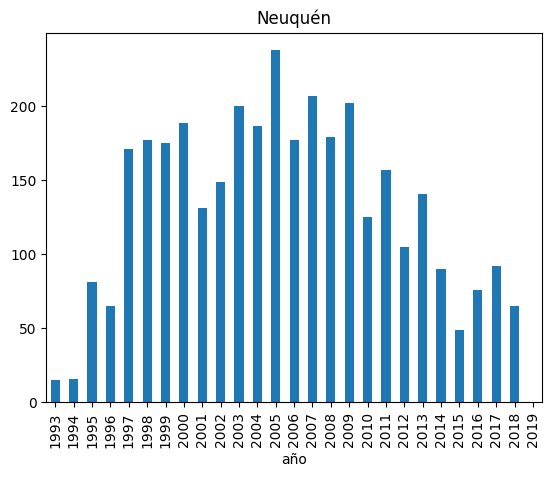

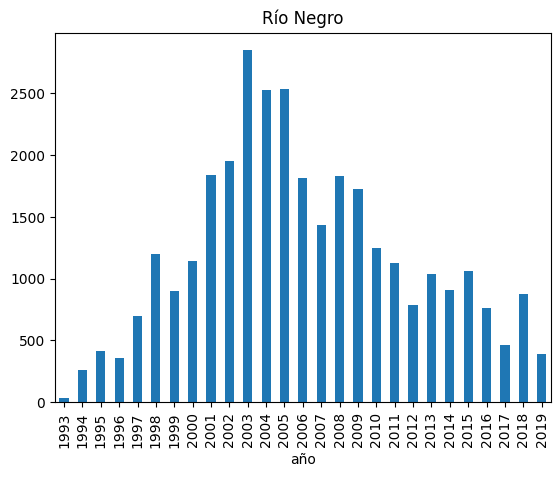

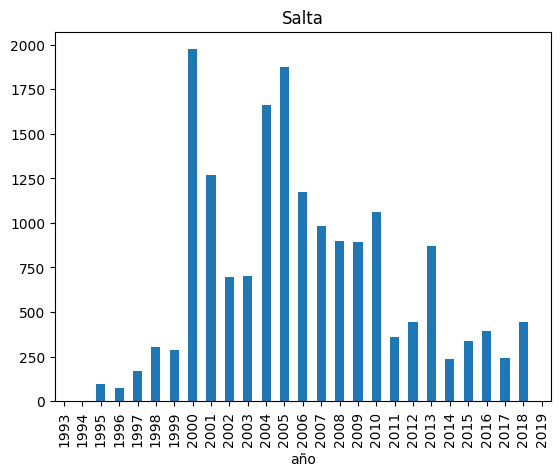

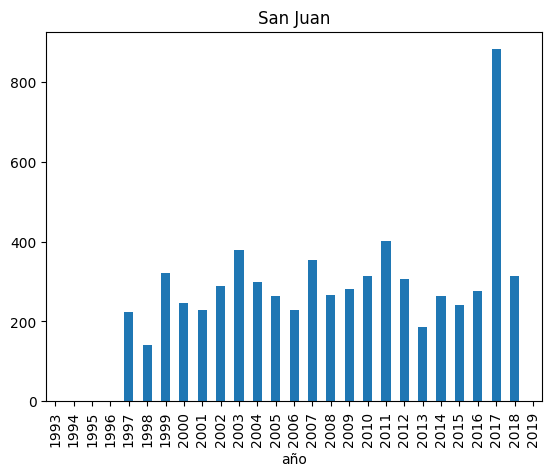

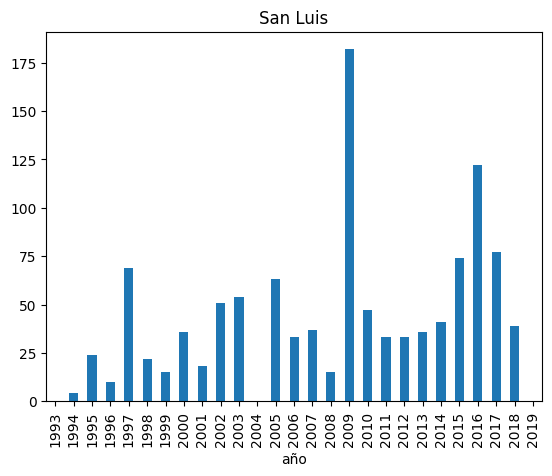

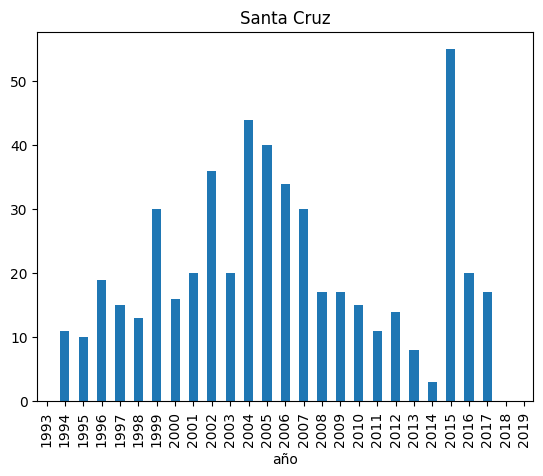

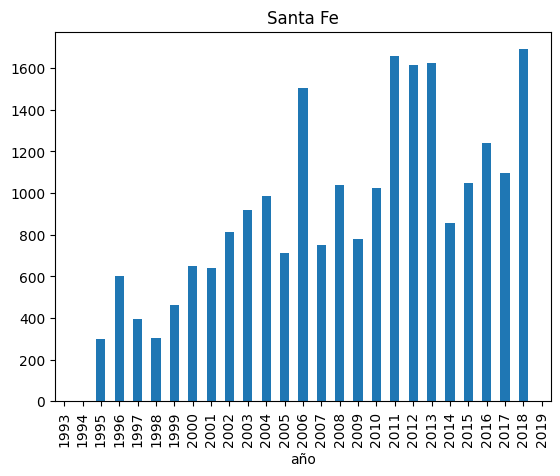

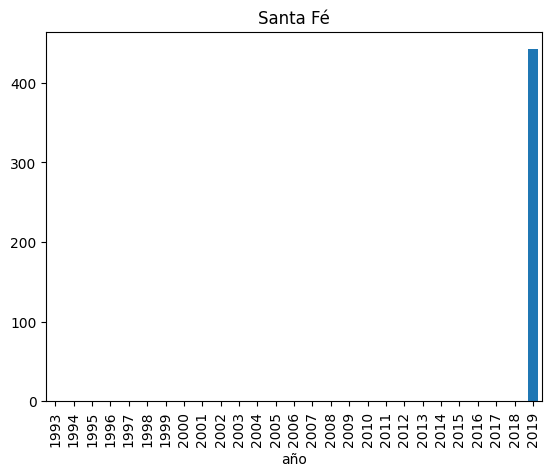

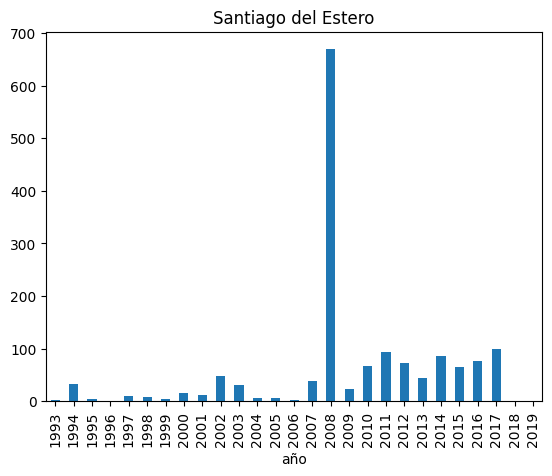

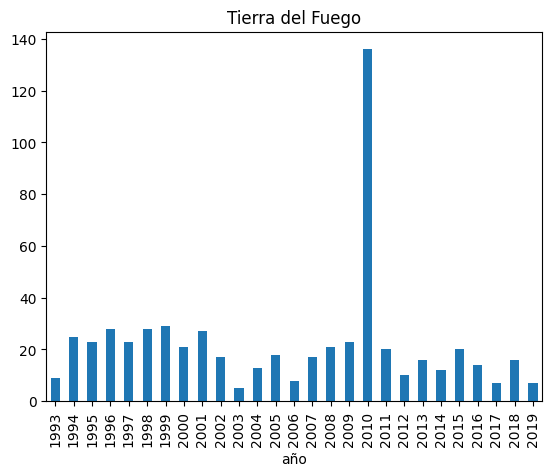

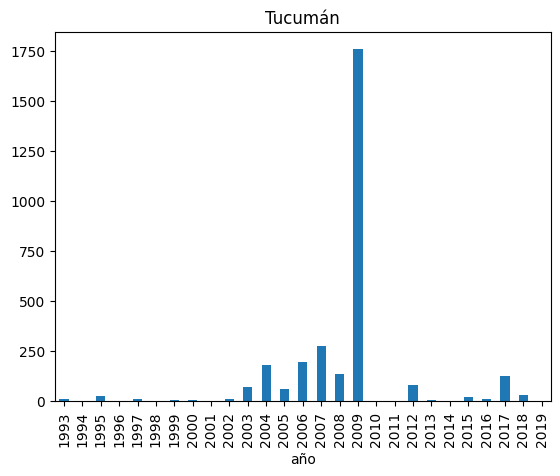

In [22]:
# Generate multiple bar plots, one for each row in the pivot table (each province)
for index, row in pivot_sansPN.iterrows():
    row.plot(kind='bar', title=index)
    plt.show()
  